In [5]:
from environment import CombatEnvironment

In [ ]:
"""
Set drones and defences according to the newly provided coordinates.

Args:
- positions (string): "a1x, a1y, a2x, a2y, d1x, d1y, d2x, d2y".
"""

intial_positions = "0, 0, 0, 1, 1, 0, 1, 1"

env = CombatEnvironment()


In [6]:
positions = CombatEnvironment.positions

def get_state_code(drone_pos1,drone_pos2, aa1_status, aa2_status):
    # Winning
    if aa1_status == 0 and aa2_status == 0:
        return 0
    return 100000*drone_pos1[0] + 10000*drone_pos1[1]+1000*drone_pos2[0] + 100*drone_pos2[1] + 10*aa1_status + aa2_status


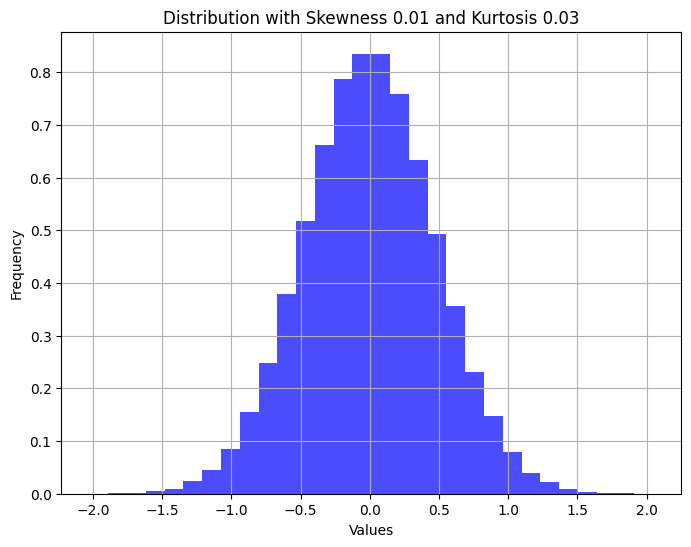

In [14]:
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

def generate_distribution(skewness, kurtosis_val, size=100000):
    # Generate random data with normal distribution
    data = np.random.normal(size=size)
    
    # Calculate current skewness and kurtosis
    current_skewness = skew(data)
    current_kurtosis = kurtosis(data)
    
    # Transform data to achieve desired skewness and kurtosis
    data = (data - np.mean(data)) / np.std(data)  # Standardize data
    data = (data * np.sqrt(1 + (skewness - current_skewness) / 6 * size / (size - 1)))  # Adjust skewness
    data = (data * (1 + (kurtosis_val - current_kurtosis) / 12 * size / (size - 1)))  # Adjust kurtosis
    
    return data

def plot_distribution(data):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, density=True, alpha=0.7, color='b')
    plt.title('Distribution with Skewness {:.2f} and Kurtosis {:.2f}'.format(skew(data), kurtosis(data)))
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Input desired skewness and kurtosis
desired_skewness = -5
desired_kurtosis = 2
# Generate data with desired skewness and kurtosis
data = generate_distribution(desired_skewness, desired_kurtosis)

# Plot the distribution
plot_distribution(data)
